In [ ]:
from src.utils.Splitter import Splitter
import numpy as np

from src.utils.viz import display_grayscale

In [ ]:
from src.utils.viz import display_grayscale

In [3]:
def feature_map_to_property_map(feature_map):
    # of size (a, b, n_features)
    a, b = feature_map.shape[0], feature_map.shape[1]
    features = np.mean(feature_map, axis=(0,1))
    properties = np.random.random((3))
    property_maps = [np.full((a, b), prop) for prop in properties]
    return np.array(property_maps).transpose(1,2,0)

In [10]:
mask_func = feature_map_to_property_map
# mean but count out the 0s
### COULD CAUSE BUGS IDC
join_func = lambda x, y: np.where(np.isnan(x), y, x)

# batch size has no effect unless the underlying extractor has batch processing implemented, in which case it should accelerate everything
splitter = Splitter(64, batch_size=1, mask_function=mask_func, join_function=join_func)

In [11]:
fake_features = np.random.random((412, 156, 5))

In [12]:
a = feature_map_to_property_map(fake_features)

In [13]:
output = splitter.process(fake_features)

In [14]:
output[400, :, 2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

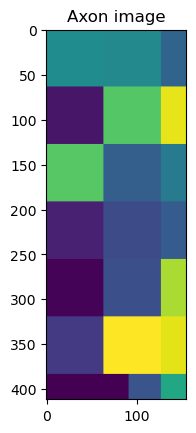

In [17]:
display_grayscale(output[:, :, 0])